In [1]:
## Step 1: Environment Setup
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [2]:
## Step 2: Data Loading and Processing
# Define the function to load JSON file into DataFrame chunks
# This section is commented out because the data has already been processed.
# Uncomment if you need to reprocess the raw JSON files in the future.
#
def load_motion_data(json_file, chunk_size=100):
    with open(json_file, 'r') as f:
        data = json.load(f)

    frames = []
    if isinstance(data, list) and isinstance(data[0], list):
        for nested_list in data:  # First-level list
            for idx, entry in enumerate(nested_list):  # Second-level list
                if idx % chunk_size == 0 and idx > 0:
                    yield pd.DataFrame(frames)  # Yield the chunk
                    frames = []  # Reset frames
                if 'keypoints' in entry:
                    keypoints = entry['keypoints']
                    frame_data = {
                        f"keypoint_{i}_x": point[0] for i, point in enumerate(keypoints)
                    }
                    frame_data.update({
                        f"keypoint_{i}_y": point[1] for i, point in enumerate(keypoints)
                    })
                    frame_data['timestamp'] = len(frames)
                    frames.append(frame_data)
            # Yield remaining frames after loop
            if frames:
                yield pd.DataFrame(frames)
    else:
        print(f"Unsupported structure in {json_file}.")

# Define the directory containing the squash-processed JSON files
squash_data_dir = '/Users/ishaingersol/Desktop/Dataset/squash-processed/'
output_dir = '/Users/ishaingersol/Desktop/Dataset/processed_output/'  # Directory for intermediate outputs
os.makedirs(output_dir, exist_ok=True)  # Create output directory if it doesn't exist

# Function to process a single JSON file in chunks and save the results
# def process_and_save_file_in_chunks(json_file, output_dir):
#     file_path = os.path.join(squash_data_dir, json_file)
#     chunk_idx = 0
#     for chunk in load_motion_data(file_path):
#         output_path = os.path.join(output_dir, f"{json_file.replace('.json', '')}_chunk_{chunk_idx}.csv")
#         chunk.to_csv(output_path, index=False)
#         print(f"Processed and saved chunk: {output_path}")
#         chunk_idx += 1

# Process each file individually and save in chunks
# squash_data_files = [f for f in os.listdir(squash_data_dir) if f.endswith('.json')]
# print("Found JSON files:", squash_data_files)

# for json_file in squash_data_files:
#     process_and_save_file_in_chunks(json_file, output_dir)

# print("All files processed and saved.")

# Combine all processed chunks into a single DataFrame if needed
# Uncomment the above section if reprocessing raw JSON data is required.

# Load already processed data from output directory
processed_files = [f for f in os.listdir(output_dir) if f.endswith('.csv')]

# Ensure the output directory is not empty
if processed_files:
    print("Found processed CSV files. Loading directly...")
    all_motion_data = pd.concat(
        [pd.read_csv(os.path.join(output_dir, f)) for f in processed_files],
        ignore_index=True
    )
    print(f"Loaded DataFrame Shape: {all_motion_data.shape}")
    print("Sample DataFrame:")
    print(all_motion_data.head())
else:
    print("No processed files found. Please run the processing step first.")

Found processed CSV files. Loading directly...
Loaded DataFrame Shape: (607695, 267)
Sample DataFrame:
   keypoint_0_x  keypoint_1_x  keypoint_2_x  keypoint_3_x  keypoint_4_x  \
0    647.216736    633.377747    647.693909    628.605652    646.739502   
1    661.984924    663.415955    660.196167    665.383545    657.155273   
2    810.991028    812.380432    809.879517    814.325623    808.073364   
3     93.629555     93.980728     91.522522     94.331902     85.552574   
4    481.148346    482.127686    479.801788    483.963898    477.720734   

   keypoint_5_x  keypoint_6_x  keypoint_7_x  keypoint_8_x  keypoint_9_x  ...  \
0    619.061523    650.079956    610.471863    641.490234    609.994629  ...   
1    668.782166    652.325684    671.465332    648.748169    666.635681  ...   
2    816.270752    804.321960    816.548645    800.431702    806.544983  ...   
3     93.453972     78.704697    103.462410     80.460556    110.310287  ...   
4    487.024261    474.782806    489.227722   

In [3]:
## Step 3: Keypoints Mapping
# Adjust keypoint indices based on supervisor's note
keypoint_mapping = {
    0: "Nose", 1: "Left Eye Inner", 2: "Left Eye", 3: "Left Eye Outer", 4: "Right Eye Inner",
    5: "Right Eye", 6: "Right Eye Outer", 7: "Left Ear", 8: "Right Ear", 9: "Mouth Left",
    10: "Mouth Right", 11: "Left Shoulder", 12: "Right Shoulder", 13: "Left Elbow", 14: "Right Elbow",
    15: "Left Wrist", 16: "Right Wrist", 17: "Left Pinky", 18: "Right Pinky", 19: "Left Index",
    20: "Right Index", 21: "Left Thumb", 22: "Right Thumb", 23: "Left Hip", 24: "Right Hip",
    25: "Left Knee", 26: "Right Knee", 27: "Left Ankle", 28: "Right Ankle", 29: "Left Heel",
    30: "Right Heel", 31: "Left Foot Index", 32: "Right Foot Index"
}

# Map additional keypoints up to 132 if needed
for idx in range(33, 133):
    keypoint_mapping[idx] = f"Keypoint_{idx}"

# Filter only columns that exist in the DataFrame
available_keypoint_columns = [col for col in [f"keypoint_{idx}_x" for idx in keypoint_mapping.keys()] + [f"keypoint_{idx}_y" for idx in keypoint_mapping.keys()] if col in all_motion_data.columns]
if 'timestamp' in all_motion_data.columns:
    available_keypoint_columns.append('timestamp')

# Extract available keypoint data for visualisation
keypoint_data = all_motion_data[available_keypoint_columns]

# Rename columns for clarity
keypoint_data.rename(columns={
    f"keypoint_{idx}_x": f"{name}_x" for idx, name in keypoint_mapping.items() if f"keypoint_{idx}_x" in keypoint_data.columns
}, inplace=True)
keypoint_data.rename(columns={
    f"keypoint_{idx}_y": f"{name}_y" for idx, name in keypoint_mapping.items() if f"keypoint_{idx}_y" in keypoint_data.columns
}, inplace=True)

# Display sample of the extracted data
print("Keypoint Data Sample:")
print(keypoint_data.head())

Keypoint Data Sample:
       Nose_x  Left Eye Inner_x  Left Eye_x  Left Eye Outer_x  \
0  647.216736        633.377747  647.693909        628.605652   
1  661.984924        663.415955  660.196167        665.383545   
2  810.991028        812.380432  809.879517        814.325623   
3   93.629555         93.980728   91.522522         94.331902   
4  481.148346        482.127686  479.801788        483.963898   

   Right Eye Inner_x  Right Eye_x  Right Eye Outer_x  Left Ear_x  Right Ear_x  \
0         646.739502   619.061523         650.079956  610.471863   641.490234   
1         657.155273   668.782166         652.325684  671.465332   648.748169   
2         808.073364   816.270752         804.321960  816.548645   800.431702   
3          85.552574    93.453972          78.704697  103.462410    80.460556   
4         477.720734   487.024261         474.782806  489.227722   472.456909   

   Mouth Left_x  ...  Keypoint_124_y  Keypoint_125_y  Keypoint_126_y  \
0    609.994629  ...      51

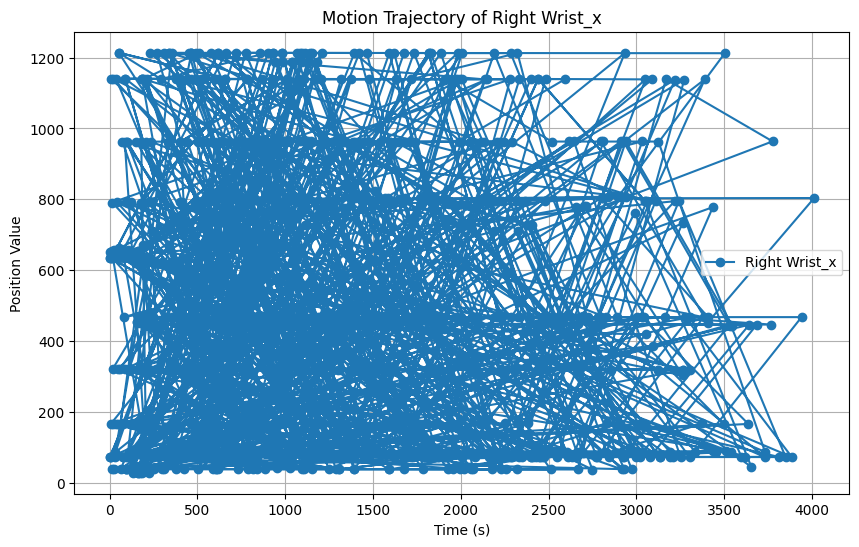

In [5]:
## Step 4: Visualisation
# Plot motion trajectories of specific keypoints over time
def plot_keypoint_motion(data, keypoint_name, max_points=1000):
    plt.figure(figsize=(10, 6))
    
    # Limit the data to max_points for plotting
    if len(data) > max_points:
        step = len(data) // max_points
        plot_data = data.iloc[::step]
    else:
        plot_data = data
    
    plt.plot(plot_data['timestamp'], plot_data[keypoint_name], label=keypoint_name, marker='o')
    plt.title(f"Motion Trajectory of {keypoint_name}")
    plt.xlabel("Time (s)")
    plt.ylabel("Position Value")
    plt.legend()
    plt.grid()
    plt.show()

# Example: Plot motion of a specific keypoint
plot_keypoint_motion(keypoint_data, "Right Wrist_x")

In [6]:
## Step 5: Basic Motion Analysis
# Calculate motion magnitude for a specific keypoint
def calculate_motion_magnitude(data, keypoint_name):
    data[f"{keypoint_name}_magnitude"] = data[keypoint_name].diff().abs()
    return data

# Example: Analyse motion magnitude of a specific keypoint
keypoint_data = calculate_motion_magnitude(keypoint_data, "Right Wrist_x")
print("Motion Magnitude Analysis Sample:")
print(keypoint_data.head())

# Additional Steps (to be extended as needed):
# - Compare motion data across different files
# - Identify patterns corresponding to backhand/forehand movements
# - Extend analysis for videos once linked to the motion data

Motion Magnitude Analysis Sample:
       Nose_x  Left Eye Inner_x  Left Eye_x  Left Eye Outer_x  \
0  647.216736        633.377747  647.693909        628.605652   
1  661.984924        663.415955  660.196167        665.383545   
2  810.991028        812.380432  809.879517        814.325623   
3   93.629555         93.980728   91.522522         94.331902   
4  481.148346        482.127686  479.801788        483.963898   

   Right Eye Inner_x  Right Eye_x  Right Eye Outer_x  Left Ear_x  Right Ear_x  \
0         646.739502   619.061523         650.079956  610.471863   641.490234   
1         657.155273   668.782166         652.325684  671.465332   648.748169   
2         808.073364   816.270752         804.321960  816.548645   800.431702   
3          85.552574    93.453972          78.704697  103.462410    80.460556   
4         477.720734   487.024261         474.782806  489.227722   472.456909   

   Mouth Left_x  ...  Keypoint_125_y  Keypoint_126_y  Keypoint_127_y  \
0    609.994629 